# Power Transformers
Power Transformers are used to normally distribution of data. Following transformers are used in this notebook.

- Box-Cox transformer. Used if data is greater than 0
- Yeo-Johnson transformer. Used for both +ve or -ve value of data
- Quantile transformer. Best one

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

<Axes: xlabel='Values', ylabel='Count'>

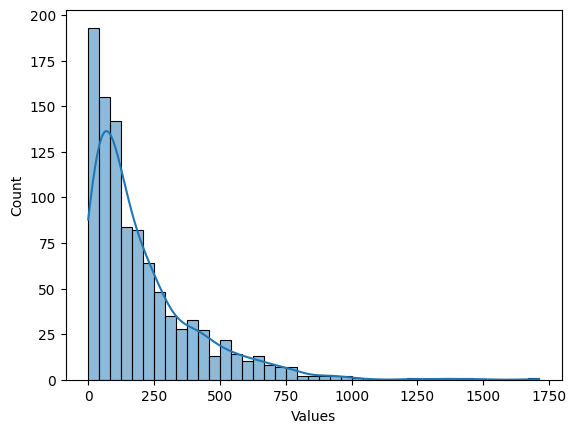

In [61]:
# create dummy or custom dataset
np.random.seed(0)
np_array = np.random.exponential(size=1000, scale=200)
df = pd.DataFrame(df, columns=["Values"])
sns.histplot(x=df["Values"], kde=True)

In [62]:
df

,Values
0,159.174902
1,251.186153
2,184.644629
3,157.440230
4,110.209698
...,...
995,20.556406
996,144.689199
997,557.457717
998,51.921716


In [63]:
df.shape

(1000, 1)

In [70]:
df.describe()

,Values,Box-Cox,Yeo-Johnson,Quantile
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,200.708042,-5.462297e-17,4.769518e-16,9.718182e-14
std,205.921755,1.000500e+00,1.000500e+00,1.020366e+00
min,0.109223,-2.991761e+00,-2.649038e+00,-5.199338e+00
25%,56.901016,-6.791903e-01,-6.824469e-01,-6.744904e-01
50%,131.295212,-1.419928e-02,-8.426242e-03,6.960578e-17
75%,267.318315,6.673701e-01,6.738956e-01,6.744904e-01
max,1712.206151,3.113899e+00,3.057484e+00,5.199338e+00


### 1. Box-Cox Transformer

In [65]:
box_cox = PowerTransformer(method="box-cox")
df["Box-Cox"] = box_cox.fit_transform(df[["Values"]])

### 2. Yeo-Johnson Transformer

In [66]:
yeo_johnson = PowerTransformer(method="yeo-johnson")
df["Yeo-Johnson"] = yeo_johnson.fit_transform(df[["Values"]])

### 3. Quantile Transformer

In [67]:
quantile = QuantileTransformer(output_distribution="normal")
df["Quantile"] = quantile.fit_transform(df[["Values"]])

In [68]:
# finally dataset is here
df

,Values,Box-Cox,Yeo-Johnson,Quantile
0,159.174902,0.158969,0.165775,0.162552
1,251.186153,0.602906,0.609739,0.587964
2,184.644629,0.298068,0.305288,0.286135
3,157.440230,0.148897,0.155659,0.157469
4,110.209698,-0.164776,-0.160364,-0.154930
...,...,...,...,...
995,20.556406,-1.326721,-1.343265,-1.315958
996,144.689199,0.072154,0.078514,0.074087
997,557.457717,1.506681,1.502366,1.475269
998,51.921716,-0.744179,-0.748689,-0.748009


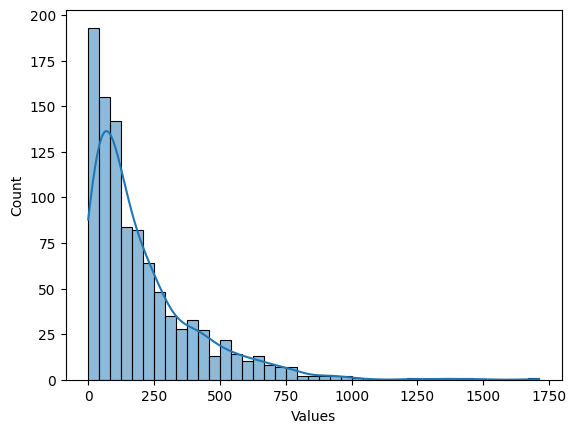

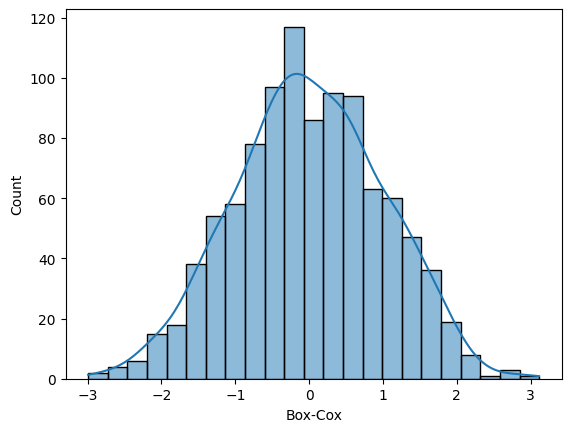

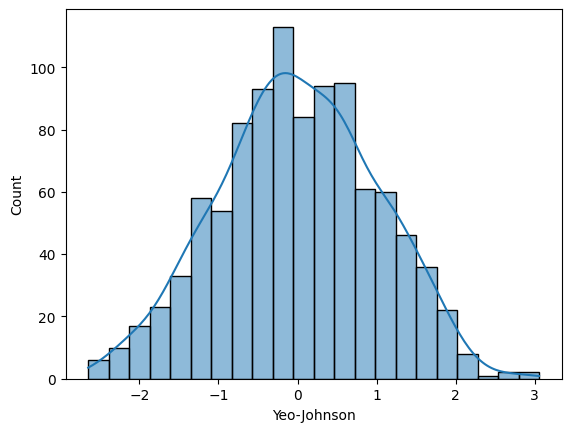

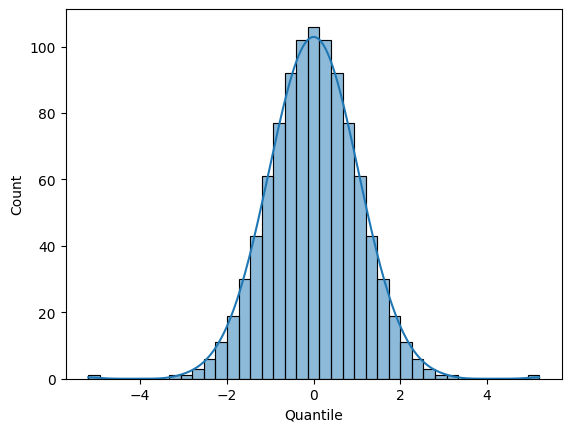

In [69]:
# visualizing dataset
for col in df.columns:
    sns.histplot(x=df[col], kde=True)
    plt.show()

# Conclusion:

We see different Power Transformers for transforming data into normal distribution which best for model accuracy. I find Quantile Transformer best one from Box-Cox and Yeo-Johnson